# Agregaciones y agrupaciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ej 2. Importar el conjunto de datos desde este [enlace](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Ej 3. Asígnalo a una variable llamada drinks.

In [3]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
# Filtrar los registros donde la columna 'continent' es NaN y vemos que todos pertenecen a NA Norte Ameríca según la división de continentes en USA
drinks[drinks['continent'].isnull()]



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [6]:
drinks["continent"].fillna('NA', inplace=True) # Al registro de continent NaN le cambio el nombre NA Norte América

C:\Users\amejo\AppData\Local\Temp\ipykernel_12552\2262818498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drinks["continent"].fillna('NA', inplace=True) # Al registro de continent NaN le cambio el nombre NA Norte América


In [7]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [8]:

drinks['continent'] = drinks['continent'].astype(object)

In [9]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### Ej 4. ¿Qué continente bebe más cerveza en promedio?

In [10]:
drinks.groupby('continent')['beer_servings'].sum().sort_values(ascending=False)

continent
EU    8720
NA    3345
AF    3258
SA    2101
AS    1630
OC    1435
Name: beer_servings, dtype: int64

In [11]:
cerveceros = drinks.groupby('continent',as_index=False)['beer_servings'].mean()
cerveceros

,continent,beer_servings
0,AF,61.471698
1,AS,37.045455
2,EU,193.777778
3,NA,145.434783
4,OC,89.687500
5,SA,175.083333


In [12]:
consumo_max = cerveceros.beer_servings.max()
print(round(consumo_max,2))
continente = cerveceros.loc[cerveceros['beer_servings']==consumo_max, 'continent'].values[0]
print(continente)

193.78
EU


In [13]:
drinks.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

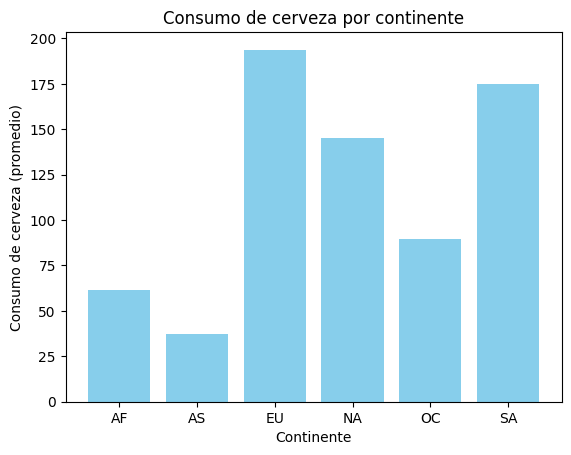

In [14]:
import matplotlib.pyplot as plt

# Datos
continentes = cerveceros['continent']
consumo_cerveza = cerveceros['beer_servings']

# Crear el gráfico de barras
plt.bar(continentes, consumo_cerveza, color='skyblue')

# Etiquetas y título
plt.xlabel('Continente')
plt.ylabel('Consumo de cerveza (promedio)')
plt.title('Consumo de cerveza por continente')

# Mostrar el gráfico
plt.show()


### Ej 5. Para cada continente imprima las estadísticas de consumo de vino.

In [15]:
consumo_vino = drinks.groupby('continent')['wine_servings'].describe()
consumo_vino

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [16]:
drinks.groupby('continent').aggregate({'wine_servings':'describe'})

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
NA                 23.0   24.521739  28.266378  1.0   5.0   11.0   34.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
NA         100.0  
OC         212.0  
SA         221.0

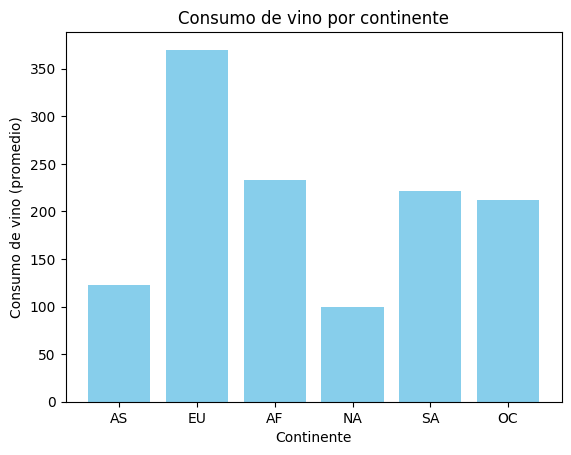

In [17]:
# Datos para gráfico
continentes_vino = drinks['continent']
consumo_vino = drinks['wine_servings']

# Crear el gráfico de barras
plt.bar(continentes_vino, consumo_vino, color='skyblue')

# Etiquetas y título
plt.xlabel('Continente')
plt.ylabel('Consumo de vino (promedio)')
plt.title('Consumo de vino por continente')

# Mostrar el gráfico
plt.show()

### Ej 6. Imprima el consumo medio de alcohol por continente para cada columna.

In [18]:
# PRIMERA FORMA

drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

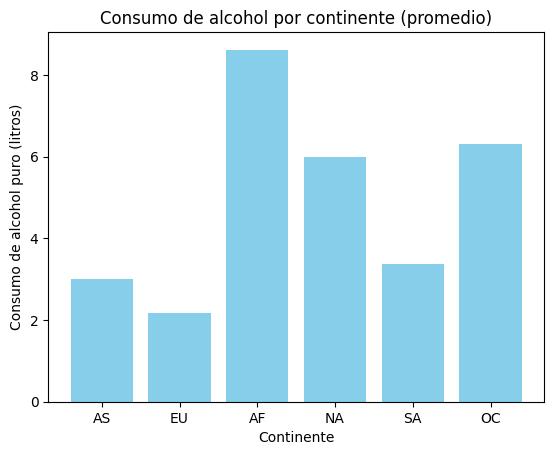

In [19]:
# Datos
continentes = drinks['continent'].unique()
consumo_alcohol = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# Crear el gráfico de barras
plt.bar(continentes, consumo_alcohol, color='skyblue')

# Etiquetas y título
plt.xlabel('Continente')
plt.ylabel('Consumo de alcohol puro (litros)')
plt.title('Consumo de alcohol por continente (promedio)')

# Mostrar el gráfico
plt.show()

In [20]:
# SEGUNDA FORMA

drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']].mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [21]:
drinks.groupby(['continent',"country"]).mean()

beer_servings  spirit_servings  wine_servings  \
continent country                                                       
AF        Algeria                25.0              0.0           14.0   
          Angola                217.0             57.0           45.0   
          Benin                  34.0              4.0           13.0   
          Botswana              173.0             35.0           35.0   
          Burkina Faso           25.0              7.0            7.0   
...                               ...              ...            ...   
SA        Paraguay              213.0            117.0           74.0   
          Peru                  163.0            160.0           21.0   
          Suriname              128.0            178.0            7.0   
          Uruguay               115.0             35.0          220.0   
          Venezuela             333.0            100.0            3.0   

                        total_litres_of_pure_alcohol  
continent country                                     
AF        Algeria                                0.7  
          Angola                                 5.9  
          Benin                                  1.1  
          Botswana                               5.4  
          Burkina Faso                           4.3  
...                                              ...  
SA        Paraguay                               7.3  
          Peru                                   6.1  
          Suriname                               5.6  
          Uruguay                                6.6  
          Venezuela                              7.7  

[193 rows x 4 columns]

In [22]:
drinks.groupby('continent').aggregate({"beer_servings" : "mean", "wine_servings" : "mean"})

,beer_servings,wine_servings
continent,,
AF,61.471698,16.264151
AS,37.045455,9.068182
EU,193.777778,142.222222
NA,145.434783,24.521739
OC,89.687500,35.625000
SA,175.083333,62.416667


### Ej 6.1 Imprima la suma de consumo de alcohol por países

In [23]:
# Crea una nueva columna llamada 'total_alcohol' que contiene la suma de las columnas numéricas
total_alcohol =drinks['total_alcohol'] = drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].sum(axis=1)

# Muestra las primeras filas del DataFrame con la nueva columna agregada
result = drinks[['country', 'total_alcohol']]
result

,country,total_alcohol
0,Afghanistan,0.0
1,Albania,279.9
2,Algeria,39.7
3,Andorra,707.4
4,Angola,324.9
...,...,...
188,Venezuela,443.7
189,Vietnam,116.0
190,Yemen,6.1
191,Zambia,57.5


### Ej 7. Imprima la mediana del consumo de alcohol por continente para cada columna.

In [24]:
drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']].median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Ej 8. Imprima los valores medio, mínimo y máximo para el consumo de bebidas espirituosas por continente.

In [25]:
# 1 FORMA
drinks.groupby("continent")["spirit_servings"].agg(spirit_medi="mean", spirit_max="max", spirit_min="min")

,spirit_medi,spirit_max,spirit_min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
NA,165.739130,438,68
OC,58.437500,254,0
SA,114.750000,302,25


In [26]:
# 2 FORMA

drinks.groupby("continent")["spirit_servings"].aggregate([np.mean,max,min])

C:\Users\amejo\AppData\Local\Temp\ipykernel_12552\242594962.py:3: FutureWarning: The provided callable <function mean at 0x000002D11654E2A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  drinks.groupby("continent")["spirit_servings"].aggregate([np.mean,max,min])
C:\Users\amejo\AppData\Local\Temp\ipykernel_12552\242594962.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  drinks.groupby("continent")["spirit_servings"].aggregate([np.mean,max,min])
C:\Users\amejo\AppData\Local\Temp\ipykernel_12552\242594962.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used dir

,mean,max,min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
NA,165.739130,438,68
OC,58.437500,254,0
SA,114.750000,302,25


In [27]:
drinks.groupby("continent")["spirit_servings"].aggregate(["mean", "max","min"])

,mean,max,min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
NA,165.739130,438,68
OC,58.437500,254,0
SA,114.750000,302,25
